# implémentation de bag of words avec python sklearn

In [1]:
from sklearn.feature_extraction.text import CountVectorizer


In [4]:
allsentences=["This pasta is very tasty and affordable.","This pasta is not tasty and is afforable.",
             "This pasta is very very delicious."]

#Create object 
countvectorizer=CountVectorizer()
#Fit courpus
X=countvectorizer.fit_transform(allsentences)
#convert result to array
result=X.toarray()
print(f"Result of bag of words\n {result}")

Result of bag of words
 [[0 1 1 0 1 0 1 1 1 1]
 [1 0 1 0 2 1 1 1 1 0]
 [0 0 0 1 1 0 1 0 1 2]]


# Implémentations de TF-IDF

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [7]:
allsentences=["This pasta is very tasty and affordable.","This pasta is not tasty and is afforable.",
             "This pasta is very very delicious."]
vectorizer=TfidfVectorizer()
vectors=vectorizer.fit_transform(allsentences)
feature_names=vectorizer.get_feature_names()
print(f"Feature names \n {feature_names}")
matrix = vectors.todense()
denselist=matrix.tolist()
df=pd.DataFrame(denselist,columns=feature_names)
print(f"final result of TF-IDF\n {df}")

Feature names 
 ['afforable', 'affordable', 'and', 'delicious', 'is', 'not', 'pasta', 'tasty', 'this', 'very']
final result of TF-IDF
    afforable  affordable       and  delicious        is       not     pasta  \
0   0.000000     0.51423  0.391085   0.000000  0.303713  0.000000  0.303713   
1   0.436446     0.00000  0.331928   0.000000  0.515544  0.436446  0.257772   
2   0.000000     0.00000  0.000000   0.478909  0.282851  0.000000  0.282851   

      tasty      this      very  
0  0.391085  0.303713  0.391085  
1  0.331928  0.257772  0.000000  
2  0.000000  0.282851  0.728445  


# Word2vec

In [9]:
import nltk
import re
nltk.download("punkt")
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
with open("wiki_us.txt","r",encoding="utf-8") as txt:
    sentences=txt.readlines()
    
print(f"Number of sentences {len(sentences)}")
print(f"First sentence :\n {sentences[0]}")

Number of sentences 9
First sentence :
 The United States of America (U.S.A. or USA), commonly known as the United States (U.S. or US) or America, is a country primarily located in North America. It consists of 50 states, a federal district, five major unincorporated territories, 326 Indian reservations, and some minor possessions.[j] At 3.8 million square miles (9.8 million square kilometers), it is the world's third- or fourth-largest country by total area.[d] The United States shares significant land borders with Canada to the north and Mexico to the south, as well as limited maritime borders with the Bahamas, Cuba, and Russia.[22] With a population of more than 331 million people, it is the third most populous country in the world. The national capital is Washington, D.C., and the most populous city is New York.



In [13]:
for index in range(len(sentences)):
    sentences[index]=re.sub("[^a-zA-Z]", " ",str(sentences[index])) #enlève pnctuation
    
print(f"First sentence after removing punctuations\n {sentences[0]}")

First sentence after removing punctuations
 The United States of America  U S A  or USA   commonly known as the United States  U S  or US  or America  is a country primarily located in North America  It consists of    states  a federal district  five major unincorporated territories      Indian reservations  and some minor possessions  j  At     million square miles      million square kilometers   it is the world s third  or fourth largest country by total area  d  The United States shares significant land borders with Canada to the north and Mexico to the south  as well as limited maritime borders with the Bahamas  Cuba  and Russia      With a population of more than     million people  it is the third most populous country in the world  The national capital is Washington  D C   and the most populous city is New York  


In [14]:
#Tokenisation
word_tokenizer=[]
for sent in sentences:
    word_tokens=word_tokenize(sent)
    word_tokenizer.append(word_tokens)
    
print(f"First sentence after toke \n {word_tokenizer[0]}")

First sentence after toke 
 ['The', 'United', 'States', 'of', 'America', 'U', 'S', 'A', 'or', 'USA', 'commonly', 'known', 'as', 'the', 'United', 'States', 'U', 'S', 'or', 'US', 'or', 'America', 'is', 'a', 'country', 'primarily', 'located', 'in', 'North', 'America', 'It', 'consists', 'of', 'states', 'a', 'federal', 'district', 'five', 'major', 'unincorporated', 'territories', 'Indian', 'reservations', 'and', 'some', 'minor', 'possessions', 'j', 'At', 'million', 'square', 'miles', 'million', 'square', 'kilometers', 'it', 'is', 'the', 'world', 's', 'third', 'or', 'fourth', 'largest', 'country', 'by', 'total', 'area', 'd', 'The', 'United', 'States', 'shares', 'significant', 'land', 'borders', 'with', 'Canada', 'to', 'the', 'north', 'and', 'Mexico', 'to', 'the', 'south', 'as', 'well', 'as', 'limited', 'maritime', 'borders', 'with', 'the', 'Bahamas', 'Cuba', 'and', 'Russia', 'With', 'a', 'population', 'of', 'more', 'than', 'million', 'people', 'it', 'is', 'the', 'third', 'most', 'populous', 

# Construire word2vec avec la méthode CBOW

In [15]:
from gensim.models import Word2Vec

In [16]:
model_cbow=Word2Vec(sentences=word_tokenizer,
                   vector_size=2,#number of dimension default 100
                   window=2, #window size default 5
                   min_count=2,#mini count of words default 5
                    workers=1,#default 3
                    sg=0 # method 0 for CBOW and 1 for Skip-Gram
                   )

#total vocabulary words for word2vec model
words_cbow=model_cbow.wv.index_to_key
print(f"Total number of words :{len(words_cbow)}")
#we can get- word embedding value for a particular word
model_cbow.wv.__getitem__(model_cbow.wv.index_to_key)


Total number of words :63


array([[-2.07128916e-02,  1.88025497e-02],
       [ 2.58897781e-01,  4.60219502e-01],
       [-4.61873800e-01, -3.45615566e-01],
       [ 3.22566777e-01,  4.50737208e-01],
       [-2.47558340e-01, -1.81219295e-01],
       [ 3.69640648e-01, -7.35363811e-02],
       [-2.25857228e-01,  3.28645557e-01],
       [-2.40683198e-01, -8.87840986e-02],
       [ 1.46887690e-01,  5.28025255e-02],
       [-4.12871510e-01, -4.68649894e-01],
       [ 3.68163228e-01,  2.57369757e-01],
       [ 3.39388162e-01,  4.42387350e-02],
       [ 3.21730524e-01, -1.67285740e-01],
       [-4.62105796e-02,  2.89348871e-01],
       [-3.74888033e-01, -1.95416480e-01],
       [-3.75946164e-01, -4.33448032e-02],
       [ 4.78054106e-01, -3.63248736e-01],
       [-1.16009764e-01, -9.49834585e-02],
       [ 4.04676199e-01, -2.94679552e-01],
       [ 4.07236908e-03, -2.33279884e-01],
       [-4.79053795e-01,  2.52652824e-01],
       [-4.37373221e-01, -2.17763543e-01],
       [-7.89436162e-05, -1.27917798e-02],
       [-3.

TypeError: annotate() missing 1 required positional argument: 'text'

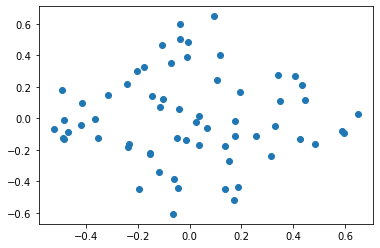

In [20]:
X=model_cbow.wv.__getitem__(model_cbow.wv.index_to_key)
#Create 2D model using PCA
pca_model=PCA(n_components=2)
result=pca_model.fit_transform(X)

plt.scatter(result[:,0],result[:,1])
words_cbow=list(model_cbow.wv.index_to_key)
for i,word in enumerate(words_cbow[:100]):
    plt.annotate(s=word,xy=(result[i,0],result[i,1]))

plt.show()